epoch: 10, loss = 4386.2852
epoch: 20, loss = 3272.2932
epoch: 30, loss = 2466.3491
epoch: 40, loss = 1882.6431
epoch: 50, loss = 1459.4720
epoch: 60, loss = 1152.4017
epoch: 70, loss = 929.3894
epoch: 80, loss = 767.2981
epoch: 90, loss = 649.4009
epoch: 100, loss = 563.5913


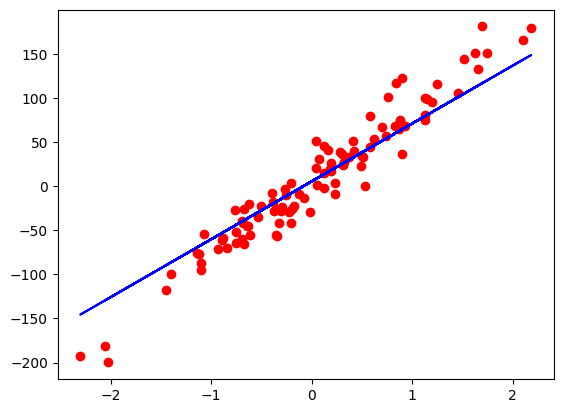

In [1]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimiser 
# 3) Training loop 
#       - forward pass: compute prediction 
#       - backward pass: gradients 
#       - update weights        

import torch
import torch.nn as nn 
import numpy as np 
from sklearn import datasets 
import matplotlib.pyplot as plt  

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimiser 
learning_rate = 0.01
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr= learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass: gradients
    loss.backward()

    # update
    optimiser.step()
    # Make sure the gradient is zero after updating
    optimiser.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
